## Importing required libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import fuzz, process
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importing datasets

In [44]:

# Load the datasets into DataFrames
df_customer = pd.read_csv("datasets/customer_dim.csv",encoding='latin-1')
df_ft = pd.read_csv("datasets/fact_table.csv",encoding='latin-1')
df_item = pd.read_csv("datasets/item_dim.csv",encoding='latin-1')
df_store = pd.read_csv("datasets/store_dim.csv",encoding='latin-1')
df_time = pd.read_csv("datasets/time_dim.csv",encoding='latin-1')
df_trans = pd.read_csv("datasets/Trans_dim.csv",encoding='latin-1')


In [45]:
df_customer

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323
...,...,...,...,...
9186,C009187,smt radha,8801563029753,1057824928189
9187,C009188,tulsi sharma,8801794982266,7970880905205
9188,C009189,madhubala,8801890032435,3101930298150
9189,C009190,pintu devi,8801563290767,7234328323528


In [46]:
df_ft

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [47]:
df_item

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans
...,...,...,...,...,...,...,...
259,I00260,Napkins Square Lunch,Kitchen Supplies,15.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
260,I00261,POM 2 ply paper towels,Kitchen Supplies,33.00,Lithuania,BIGSO AB,ct
261,I00262,Strong Everyday Napkins,Kitchen Supplies,14.00,Netherlands,Bolsius Boxmeer,ct
262,I00263,Advil 2 pill packets,Medicine,14.00,Lithuania,BIGSO AB,Ct


In [48]:
df_store

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


In [49]:
df_time

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,04-01-2015 17:22,17,4,1st Week,1,Q1,2015
99995,T099996,17-01-2015 21:09,21,17,3rd Week,1,Q1,2015
99996,T099997,23-01-2020 14:42,14,23,4th Week,1,Q1,2020
99997,T099998,31-10-2015 13:52,13,31,4th Week,10,Q4,2015


In [50]:
df_trans

,payment_key,trans_type,bank_name
0,P001,cash,None
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited
5,P006,card,Citizens Bank Limited
6,P007,card,City Bank Limited
7,P008,card,Community Bank Bangladesh Limited
8,P009,card,Dhaka Bank Limited
9,P010,card,Dutch-Bangla Bank Limited


## Data Preprocessing

In [51]:
# # Perform inner join on common_column for all datasets
result_df = pd.merge(df_ft, df_customer, on="coustomer_key", how="inner",suffixes=(' ', ' '))
result_df = pd.merge(result_df, df_item, on="item_key", how="inner",suffixes=(' ', ' '))
result_df = pd.merge(result_df, df_store, on="store_key", how="inner",suffixes=(' ', ' '))
result_df = pd.merge(result_df, df_time, on="time_key", how="inner",suffixes=(' ', ' '))

# Drop duplicate columns
result_df = result_df.loc[:,~result_df.columns.duplicated()]
result_df['date']=pd.to_datetime(result_df['date'])
result_df.dropna(inplace=True)
result_df.sort_values(by='date', inplace=True)
result_df.reset_index(drop=True, inplace=True)
result_df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,name,contact_no,nid,item_name,desc,man_country,supplier,division,district,upazila,date,hour,day,week,month,quarter,year
0,P036,C007062,T048168,I00072,S00623,3,bottles,20.00,60.0,deepa,8801934201676,4502571783629,Gatorade Variety 20 oz,Beverage - Gatorade,Bangladesh,DENIMACH LTD,DHAKA,DHAKA,KAFRUL,2014-01-02 00:12:00,0,1,1st Week,2,Q1,2014
1,P017,C005802,T048168,I00014,S00714,6,cans,6.75,40.5,jyoti,8801984600266,8989306436369,Diet Mountain Dew 12oz cans,a. Beverage - Soda,Finland,HARDFORD AB,CHITTAGONG,CHITTAGONG,SANDWIP,2014-01-02 00:12:00,0,1,1st Week,2,Q1,2014
2,P035,C000576,T048168,I00040,S00334,3,bottles,22.00,66.0,rajveer,8801813811692,8153148451433,Perrier Sparkling Water plastic 16.9oz,a. Beverage Sparkling Water,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,DHAKA,MANIKGANJ,SHIBALAYA,2014-01-02 00:12:00,0,1,1st Week,2,Q1,2014
3,P012,C008876,T048168,I00112,S00458,6,ct.,14.00,84.0,roshni,8801963594612,2306789780472,Swiss Miss Hot Cocoa Mix 1 oz,Coffee Hot Cocoa,India,Indo Count Industries Ltd,CHITTAGONG,COMILLA,COMILLA SADAR DAKSHIN,2014-01-02 00:12:00,0,1,1st Week,2,Q1,2014
4,P006,C002545,T048168,I00075,S00695,2,cans,15.50,31.0,durga,8801537788626,4659546547005,Brisk Lemon Iced Tea - 12 oz cans,Beverage - Iced Tea,United States,MAESA SAS,CHITTAGONG,CHITTAGONG,BAKALIA,2014-01-02 00:12:00,0,1,1st Week,2,Q1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993301,P012,C008121,T095988,I00087,S00713,8,bottles,15.00,120.0,hasina,8801577069087,5428244300391,V-8 Splash Variety 20 oz,Beverage - Juice,China,"CHERRY GROUP CO.,LTD",CHITTAGONG,CHITTAGONG,RAOZAN,2021-12-01 22:58:00,22,12,2nd Week,1,Q1,2021
993302,P024,C008793,T095988,I00248,S00193,2,rolls,26.00,52.0,priti,8801860651345,6698377575017,Charmin Ultra Bath Tissue,Kitchen Supplies,Bangladesh,DENIMACH LTD,KHULNA,JHENAIDAH,MAHESHPUR,2021-12-01 22:58:00,22,12,2nd Week,1,Q1,2021
993303,P004,C004980,T095988,I00069,S00333,4,bottles,17.50,70.0,kalavati,8801663946790,7305902888686,Gatorade Frost Variety 12 oz,Beverage - Gatorade,Bangladesh,DENIMACH LTD,DHAKA,MANIKGANJ,SATURIA,2021-12-01 22:58:00,22,12,2nd Week,1,Q1,2021
993304,P033,C006491,T095988,I00159,S00646,4,bags,17.00,68.0,malti,8801834660272,3993025132109,Frito BOLD Flavors Variety Pack,Food - Chips,Bangladesh,DENIMACH LTD,DHAKA,DHAKA,MUGDA PARA,2021-12-01 22:58:00,22,12,2nd Week,1,Q1,2021


In [52]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993306 entries, 0 to 993305
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   payment_key    993306 non-null  object        
 1   coustomer_key  993306 non-null  object        
 2   time_key       993306 non-null  object        
 3   item_key       993306 non-null  object        
 4   store_key      993306 non-null  object        
 5   quantity       993306 non-null  int64         
 6   unit           993306 non-null  object        
 7   unit_price     993306 non-null  float64       
 8   total_price    993306 non-null  float64       
 9   name           993306 non-null  object        
 10  contact_no     993306 non-null  int64         
 11  nid            993306 non-null  int64         
 12  item_name      993306 non-null  object        
 13  desc           993306 non-null  object        
 14  man_country    993306 non-null  object        
 15  

In [53]:
# ## Selecting top 20 customers
# top_20_cust=list(result_df['coustomer_key'].value_counts().head(20).keys())
# result_df=result_df[result_df['coustomer_key'].isin(top_10_cust)]
# result_df.reset_index(drop=True, inplace=True)
# result_df

## Selecting top 10 items
top_10_item=list(result_df['item_key'].value_counts().head(10).keys())
result_df=result_df[result_df['item_key'].isin(top_10_item)]
result_df.reset_index(drop=True, inplace=True)
result_df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,name,contact_no,nid,item_name,desc,man_country,supplier,division,district,upazila,date,hour,day,week,month,quarter,year
0,P036,C000998,T099502,I00203,S00549,1,ct,18.0,18.0,seema,8801586706760,6045942737754,Nat.Valley PeanutButter Protein Bars,Food - Healthy,Lithuania,BIGSO AB,BARISAL,PATUAKHALI,RANGABALI,2014-01-02 02:31:00,2,1,1st Week,2,Q1,2014
1,P009,C008124,T099502,I00155,S00465,1,bags,17.0,17.0,saifali,8801530827328,2087597611846,Doritos Nacho Cheese 1 oz,Food - Chips,India,Indo Count Industries Ltd,CHITTAGONG,COMILLA,MEGHNA,2014-01-02 02:31:00,2,1,1st Week,2,Q1,2014
2,P039,C001302,T046900,I00082,S00123,7,ct,15.0,105.0,menadevi,8801955404440,3677924296823,100% Juice Box Variety 6.75 oz,Beverage - Juice,Lithuania,BIGSO AB,RAJSHAHI,NAOGAON,RANINAGAR,2014-01-02 04:05:00,4,1,1st Week,2,Q1,2014
3,P010,C007287,T025901,I00203,S00497,5,ct,18.0,90.0,sita,8801864259699,1543778038833,Nat.Valley PeanutButter Protein Bars,Food - Healthy,Lithuania,BIGSO AB,CHITTAGONG,NOAKHALI,CHATKHIL,2014-01-02 06:50:00,6,1,1st Week,2,Q1,2014
4,P011,C003729,T080123,I00155,S00314,1,bags,17.0,17.0,lal baano,8801584239461,8219529245621,Doritos Nacho Cheese 1 oz,Food - Chips,India,Indo Count Industries Ltd,DHAKA,KISHOREGONJ,BHAIRAB,2014-01-02 06:52:00,6,1,1st Week,2,Q1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39070,P025,C003618,T015925,I00082,S0041,3,ct,15.0,45.0,manisha,8801876575233,8568048434629,100% Juice Box Variety 6.75 oz,Beverage - Juice,Lithuania,BIGSO AB,RANGPUR,DINAJPUR,BIRAL,2021-12-01 12:35:00,12,12,2nd Week,1,Q1,2021
39071,P001,C003399,T02977,I00203,S00676,6,ct,18.0,108.0,sudama with 2 children,8801740581252,5767994032459,Nat.Valley PeanutButter Protein Bars,Food - Healthy,Lithuania,BIGSO AB,DHAKA,DHAKA,SUTRAPUR,2021-12-01 13:14:00,13,12,2nd Week,1,Q1,2021
39072,P006,C003402,T084533,I00254,S00241,7,oz,13.0,91.0,shital,8801786438377,2102968208302,Hand Sanitizer Refill Pump,Kitchen Supplies,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,DHAKA,DHAKA,DEMRA,2021-12-01 14:29:00,14,12,2nd Week,1,Q1,2021
39073,P010,C002301,T071260,I00203,S00388,6,ct,18.0,108.0,rajni,8801692281325,8915345730210,Nat.Valley PeanutButter Protein Bars,Food - Healthy,Lithuania,BIGSO AB,DHAKA,SHERPUR,NAKLA,2021-12-01 16:21:00,16,12,2nd Week,1,Q1,2021


In [54]:
selected_columns=['coustomer_key','store_key','item_key','quantity', 'unit ', 'unit_price ','total_price', 'desc', 'man_country','supplier',  'date', 'year']
df=result_df[selected_columns]
df.rename(columns={"unit ":"unit","unit_price ":"unit_price"},inplace=True)
df


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,desc,man_country,supplier,date,year
0,C000998,S00549,I00203,1,ct,18.0,18.0,Food - Healthy,Lithuania,BIGSO AB,2014-01-02 02:31:00,2014
1,C008124,S00465,I00155,1,bags,17.0,17.0,Food - Chips,India,Indo Count Industries Ltd,2014-01-02 02:31:00,2014
2,C001302,S00123,I00082,7,ct,15.0,105.0,Beverage - Juice,Lithuania,BIGSO AB,2014-01-02 04:05:00,2014
3,C007287,S00497,I00203,5,ct,18.0,90.0,Food - Healthy,Lithuania,BIGSO AB,2014-01-02 06:50:00,2014
4,C003729,S00314,I00155,1,bags,17.0,17.0,Food - Chips,India,Indo Count Industries Ltd,2014-01-02 06:52:00,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
39070,C003618,S0041,I00082,3,ct,15.0,45.0,Beverage - Juice,Lithuania,BIGSO AB,2021-12-01 12:35:00,2021
39071,C003399,S00676,I00203,6,ct,18.0,108.0,Food - Healthy,Lithuania,BIGSO AB,2021-12-01 13:14:00,2021
39072,C003402,S00241,I00254,7,oz,13.0,91.0,Kitchen Supplies,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2021-12-01 14:29:00,2021
39073,C002301,S00388,I00203,6,ct,18.0,108.0,Food - Healthy,Lithuania,BIGSO AB,2021-12-01 16:21:00,2021


- #### Creating a categorical column from desc

In [55]:
from rapidfuzz import fuzz, process
# Given categories
categories = {
    'Chocolate': ['Food - Chocolate'],
    'Coffee Cream': ['Coffee Cream'],
    'Sparkling Water': ['Sparkling Water'],
    'Energy/Protein': ['Protein', 'Shake', 'Energy'],
    'Cups Hot': ['Cups Hot'],
    'Water': ['Water'],
    'Plates': ['Plates'],
    'Coffee Ground': ['Coffee Ground'],
    'Gatorade': ['Gatorade'],
    'Kitchen Supplies': ['Kitchen Supplies'],
    'Sweets': ['Sweets'],
    'Healthy': ['Healthy'],
    'Chips': ['Chips'],
    'Soda': ['Soda'],
    'Iced Tea': ['Iced Tea'],
    'Nuts': ['Nuts'],
    'Juice': ['Juice'],
    'Hot Cocoa': ['Hot Cocoa'],
    'K-Cups': ['K-Cups'],
    'Sweetener': ['Sweetener'],
    'Cups Cold': ['Cups Cold'],
    'Bowls': ['Bowls'],
    'Snacks': ['Snacks'],
    'Gum/Mints': ['Gum', 'Mints'],
    'Utensils': ['Utensils'],
    'Medicine': ['Medicine'],
    'Tea': ['Tea'],
    'Energy/Protein': ['Energy/Protein'],
    'Stirrers': ['Stirrers'],
    'Creamer': ['Creamer']
}


# Function to assign category based on similarity
def assign_category(tag):
    max_similarity = 0
    selected_category = 'Other'

    for category, keywords in categories.items():
        for keyword in keywords:
            similarity = fuzz.token_set_ratio(tag.lower(), keyword.lower())
            if similarity > max_similarity and similarity >= 55:
                max_similarity = similarity
                selected_category = category

    return selected_category

# Apply the function to create a new 'category' column
df['category'] = df['desc'].apply(assign_category)

# Display the DataFrame with the new 'category' column
df



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,desc,man_country,supplier,date,year,category
0,C000998,S00549,I00203,1,ct,18.0,18.0,Food - Healthy,Lithuania,BIGSO AB,2014-01-02 02:31:00,2014,Healthy
1,C008124,S00465,I00155,1,bags,17.0,17.0,Food - Chips,India,Indo Count Industries Ltd,2014-01-02 02:31:00,2014,Chips
2,C001302,S00123,I00082,7,ct,15.0,105.0,Beverage - Juice,Lithuania,BIGSO AB,2014-01-02 04:05:00,2014,Juice
3,C007287,S00497,I00203,5,ct,18.0,90.0,Food - Healthy,Lithuania,BIGSO AB,2014-01-02 06:50:00,2014,Healthy
4,C003729,S00314,I00155,1,bags,17.0,17.0,Food - Chips,India,Indo Count Industries Ltd,2014-01-02 06:52:00,2014,Chips
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39070,C003618,S0041,I00082,3,ct,15.0,45.0,Beverage - Juice,Lithuania,BIGSO AB,2021-12-01 12:35:00,2021,Juice
39071,C003399,S00676,I00203,6,ct,18.0,108.0,Food - Healthy,Lithuania,BIGSO AB,2021-12-01 13:14:00,2021,Healthy
39072,C003402,S00241,I00254,7,oz,13.0,91.0,Kitchen Supplies,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2021-12-01 14:29:00,2021,Kitchen Supplies
39073,C002301,S00388,I00203,6,ct,18.0,108.0,Food - Healthy,Lithuania,BIGSO AB,2021-12-01 16:21:00,2021,Healthy


In [56]:
df.drop('desc', axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Analysis

- #### Customer Analysis

In [57]:
df.groupby('coustomer_key').agg({'date':['min','max','count'],'quantity':['max','mean','std']})


date                           quantity                    
                              min                 max count      max      mean       std
coustomer_key                                                                           
C000001       2014-08-22 00:15:00 2020-12-30 18:45:00     4       10  6.250000  3.500000
C000002       2014-06-24 00:27:00 2019-09-29 11:17:00     6        9  5.333333  2.943920
C000003       2016-10-27 08:38:00 2019-09-01 08:39:00     5       11  7.400000  4.098780
C000004       2015-01-31 05:04:00 2018-10-10 11:20:00     6        9  7.166667  2.562551
C000005       2017-02-21 17:59:00 2017-02-21 17:59:00     1        6  6.000000       NaN
...                           ...                 ...   ...      ...       ...       ...
C009186       2014-03-24 08:08:00 2019-09-06 01:31:00     5       11  5.800000  3.420526
C009187       2015-01-27 01:28:00 2020-12-05 08:58:00     5       11  6.400000  4.335897
C009188       2014-07-06 22:29:00 2020-05-02 23:53:00     7       11  7.857143  2.340126
C009189       2014-01-23 20:48:00 2017-07-30 02:23:00     3        8  5.666667  4.041452
C009191       2014-05-31 03:45:00 2020-12-17 09:35:00     6       10  6.833333  2.714160

[9030 rows x 6 columns]

In [58]:
df['coustomer_key'].nunique()

9030

In [59]:
df['coustomer_key'].value_counts(ascending=False)


C002059    15
C000580    13
C004107    13
C002282    13
C002695    13
           ..
C005063     1
C006491     1
C001529     1
C004212     1
C007728     1
Name: coustomer_key, Length: 9030, dtype: int64

- ### Item Analysis

In [60]:
df.groupby('item_key').agg({'date':['min','max','count'],'quantity':['mean','std']})


date                            quantity          
                         min                 max count      mean       std
item_key                                                                  
I00015   2014-01-02 14:34:00 2021-11-01 04:41:00  3944  6.063387  3.180278
I00061   2014-01-03 09:19:00 2021-12-01 07:00:00  3897  6.071850  3.170298
I00082   2014-01-02 04:05:00 2021-12-01 12:35:00  3916  5.969612  3.136136
I00083   2014-01-03 13:45:00 2021-12-01 05:24:00  3899  5.968966  3.154205
I00155   2014-01-02 02:31:00 2021-11-01 13:27:00  3894  5.977658  3.136220
I00203   2014-01-02 02:31:00 2021-12-01 16:21:00  3924  6.079256  3.165434
I00230   2014-01-03 04:16:00 2021-12-01 04:15:00  3900  6.092564  3.141511
I00254   2014-01-02 15:51:00 2021-12-01 18:15:00  3896  5.976643  3.133277
I00257   2014-01-03 04:16:00 2021-11-01 23:36:00  3909  5.979279  3.233387
I00260   2014-01-03 19:24:00 2021-11-01 21:11:00  3896  5.947895  3.128420

In [61]:
df['item_key'].nunique()


10

In [62]:
df['item_key'].value_counts(ascending=False)


I00015    3944
I00203    3924
I00082    3916
I00257    3909
I00230    3900
I00083    3899
I00061    3897
I00254    3896
I00260    3896
I00155    3894
Name: item_key, dtype: int64

- ### Store Analysis

In [63]:
df.groupby('store_key').agg({'date':['min','max','count']})


date                          
                          min                 max count
store_key                                              
S0001     2014-02-03 03:00:00 2020-10-27 07:29:00    46
S0002     2014-01-30 14:50:00 2020-12-28 08:40:00    49
S0003     2014-04-17 23:36:00 2020-11-07 15:52:00    55
S0004     2014-02-11 17:17:00 2020-11-14 04:16:00    58
S0005     2014-03-11 03:06:00 2020-12-20 20:59:00    61
...                       ...                 ...   ...
S0095     2014-01-12 14:43:00 2020-12-30 18:11:00    66
S0096     2014-01-30 07:39:00 2021-01-16 15:13:00    70
S0097     2014-04-14 05:49:00 2020-12-05 10:40:00    48
S0098     2014-01-05 02:07:00 2021-01-21 15:09:00    49
S0099     2014-01-27 05:10:00 2021-02-01 23:21:00    56

[726 rows x 3 columns]

In [64]:
df['store_key'].nunique()


726

In [65]:
df['store_key'].value_counts(ascending=False)


S0009     76
S00660    75
S00647    75
S00282    74
S00534    74
          ..
S00609    38
S0043     37
S00339    36
S00381    35
S00477    34
Name: store_key, Length: 726, dtype: int64

# EDA
- ### Visualizing customer purschasing pattern

In [66]:
import plotly.express as px

# Assuming daily_data is a DataFrame with a 'date' column
# test_data=df.copy()
# test_data=df[(df['coustomer_key']=='C006906') & (df['store_key']=='S0039')]
test_data=df[(df['coustomer_key']=='C006906') ]
fig = px.line(test_data, x='date', y='quantity', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))

# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()
test_data

,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,man_country,supplier,date,year,category
4387,C006906,S00313,I00254,4,oz,13.0,52.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2014-10-29 02:34:00,2014,Kitchen Supplies
8382,C006906,S00561,I00155,4,bags,17.0,68.0,India,Indo Count Industries Ltd,2015-07-13 06:34:00,2015,Chips
13517,C006906,S00345,I00254,4,oz,13.0,52.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2016-06-16 03:02:00,2016,Kitchen Supplies
21270,C006906,S00636,I00082,8,ct,15.0,120.0,Lithuania,BIGSO AB,2017-11-13 15:20:00,2017,Juice
33464,C006906,S00521,I00254,6,oz,13.0,78.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2020-01-17 08:46:00,2020,Kitchen Supplies
37976,C006906,S00352,I00082,2,ct,15.0,30.0,Lithuania,BIGSO AB,2020-11-09 19:36:00,2020,Juice


In [67]:
# Assuming daily_data is a DataFrame with a 'date' column
# test_data=df.copy()
# test_data=df[(df['coustomer_key']=='C006906') & (df['store_key']=='S0039')]
test_data=df[(df['coustomer_key']=='C005316') ]
fig = px.line(test_data, x='date', y='quantity', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))
# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)
fig.show()
test_data

,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,man_country,supplier,date,year,category
1878,C005316,S0071,I00254,7,oz,13.00,91.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2014-05-11 20:28:00,2014,Kitchen Supplies
3626,C005316,S00283,I00230,10,pk,15.00,150.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2014-09-05 09:33:00,2014,Sweets
9576,C005316,S00702,I00230,4,pk,15.00,60.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2015-09-28 07:43:00,2015,Sweets
14624,C005316,S00560,I00082,1,ct,15.00,15.00,Lithuania,BIGSO AB,2016-08-27 10:06:00,2016,Juice
20912,C005316,S00250,I00015,1,cans,6.75,6.75,India,Indo Count Industries Ltd,2017-10-18 03:57:00,2017,Soda
23847,C005316,S00422,I00015,8,cans,6.75,54.00,India,Indo Count Industries Ltd,2018-05-05 01:22:00,2018,Soda
31011,C005316,S00125,I00230,5,pk,15.00,75.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2019-08-11 09:40:00,2019,Sweets
37105,C005316,S00625,I00061,10,cans,55.00,550.00,United States,MAESA SAS,2020-09-16 01:44:00,2020,Energy/Protein


- ## Visualizing item selling pattern

In [68]:
data_item=pd.DataFrame(df.groupby(['category','item_key'])['quantity'].sum().reset_index())
data_item

,category,item_key,quantity
0,Chips,I00155,23277
1,Energy/Protein,I00061,23662
2,Healthy,I00203,23855
3,Juice,I00082,23377
4,Juice,I00083,23273
5,Kitchen Supplies,I00254,23285
6,Kitchen Supplies,I00257,23373
7,Kitchen Supplies,I00260,23173
8,Soda,I00015,23914
9,Sweets,I00230,23761


In [69]:
import plotly.express as px

# Assuming daily_data is a DataFrame with a 'date' column
# test_data=df.copy()
# test_data=df[(df['coustomer_key']=='C006906') & (df['store_key']=='S0039')]
test_data=df[(df['item_key']=='I00015') ]
fig = px.line(test_data, x='date', y='quantity', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))

# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()
test_data



,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,man_country,supplier,date,year,category
7,C008997,S00554,I00015,7,cans,6.75,47.25,India,Indo Count Industries Ltd,2014-01-02 14:34:00,2014,Soda
13,C001122,S00451,I00015,2,cans,6.75,13.50,India,Indo Count Industries Ltd,2014-01-03 01:32:00,2014,Soda
24,C006211,S00666,I00015,7,cans,6.75,47.25,India,Indo Count Industries Ltd,2014-01-03 15:36:00,2014,Soda
47,C004894,S0098,I00015,4,cans,6.75,27.00,India,Indo Count Industries Ltd,2014-01-05 02:07:00,2014,Soda
51,C005105,S00660,I00015,8,cans,6.75,54.00,India,Indo Count Industries Ltd,2014-01-06 01:19:00,2014,Soda
...,...,...,...,...,...,...,...,...,...,...,...,...
39026,C007476,S00683,I00015,7,cans,6.75,47.25,India,Indo Count Industries Ltd,2021-09-01 10:33:00,2021,Soda
39034,C005810,S00218,I00015,1,cans,6.75,6.75,India,Indo Count Industries Ltd,2021-09-01 19:34:00,2021,Soda
39040,C003829,S00417,I00015,1,cans,6.75,6.75,India,Indo Count Industries Ltd,2021-10-01 00:43:00,2021,Soda
39049,C002279,S00131,I00015,7,cans,6.75,47.25,India,Indo Count Industries Ltd,2021-10-01 22:10:00,2021,Soda


In [70]:
import plotly.express as px

# Assuming daily_data is a DataFrame with a 'date' column
# test_data=df.copy()
# test_data=df[(df['coustomer_key']=='C006906') & (df['store_key']=='S0039')]
test_data=df[(df['item_key']=='I00203') ]
fig = px.line(test_data, x='date', y='quantity', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))

# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()
test_data



,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,man_country,supplier,date,year,category
0,C000998,S00549,I00203,1,ct,18.0,18.0,Lithuania,BIGSO AB,2014-01-02 02:31:00,2014,Healthy
3,C007287,S00497,I00203,5,ct,18.0,90.0,Lithuania,BIGSO AB,2014-01-02 06:50:00,2014,Healthy
5,C008658,S00229,I00203,10,ct,18.0,180.0,Lithuania,BIGSO AB,2014-01-02 06:52:00,2014,Healthy
6,C004411,S00183,I00203,2,ct,18.0,36.0,Lithuania,BIGSO AB,2014-01-02 09:41:00,2014,Healthy
23,C002039,S00486,I00203,11,ct,18.0,198.0,Lithuania,BIGSO AB,2014-01-03 14:55:00,2014,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
39054,C007823,S00108,I00203,2,ct,18.0,36.0,Lithuania,BIGSO AB,2021-11-01 09:06:00,2021,Healthy
39055,C002675,S0055,I00203,11,ct,18.0,198.0,Lithuania,BIGSO AB,2021-11-01 09:06:00,2021,Healthy
39061,C008217,S00424,I00203,11,ct,18.0,198.0,Lithuania,BIGSO AB,2021-11-01 22:23:00,2021,Healthy
39071,C003399,S00676,I00203,6,ct,18.0,108.0,Lithuania,BIGSO AB,2021-12-01 13:14:00,2021,Healthy


## Checking features importance

#### taking only top 10 customer in order to reduce the dataset size

In [71]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

df_encoded = df.copy()

# Label Encoding
label_encoder = LabelEncoder()
for column in ['coustomer_key', 'store_key', 'item_key', 'unit', 'category','man_country', 'supplier', 'date']:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Standardization
numeric_columns = ['coustomer_key', 'store_key', 'item_key', 'unit', 'category','man_country', 'supplier', 'date','unit_price', 'total_price','year']
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])
df_encoded=df_encoded.reset_index(drop=True)
df_encoded
# Now, you can use the methods mentioned earlier for feature importance


,coustomer_key,store_key,item_key,quantity,unit,unit_price,total_price,man_country,supplier,date,year,category
0,-1.354704,0.670606,0.175834,1,0.295133,-0.076671,-0.918742,1.023440,-1.481908,-1.730764,-1.508429,-0.698948
1,1.322522,0.231227,-0.172138,1,-1.919070,-0.156690,-0.928294,0.383083,0.107899,-1.730764,-1.508429,-1.862027
2,-1.241080,-1.564494,-0.868081,7,0.295133,-0.316728,-0.087772,1.023440,-1.481908,-1.730656,-1.508429,-0.117409
3,1.009579,0.398382,0.175834,5,0.295133,-0.076671,-0.231043,1.023440,-1.481908,-1.730548,-1.508429,-0.698948
4,-0.328651,-0.561564,-0.172138,1,-1.919070,-0.156690,-0.928294,0.383083,0.107899,-1.730440,-1.508429,-1.862027
...,...,...,...,...,...,...,...,...,...,...,...,...
39070,-0.370351,-0.060100,-0.868081,3,0.295133,-0.316728,-0.660855,1.023440,-1.481908,1.733297,1.960022,-0.117409
39071,-0.453751,1.339225,0.175834,6,0.295133,-0.076671,-0.059118,1.023440,-1.481908,1.733404,1.960022,-0.698948
39072,-0.452603,-0.943633,0.871776,7,1.033200,-0.476767,-0.221491,-0.897630,1.167771,1.733512,1.960022,0.464130
39073,-0.866927,-0.174720,0.175834,6,0.295133,-0.076671,-0.059118,1.023440,-1.481908,1.733620,1.960022,-0.698948


In [72]:
# correlation_matrix = df[['coustomer_key', 'store_key', 'item_key', 'quantity', 'unit', 'unit_price', 'desc', 'man_country', 'supplier', 'date', 'year']].corr()
correlation_matrix= df_encoded.corr()
correlation_with_target = correlation_matrix['quantity'].abs().sort_values(ascending=False)
correlation_with_target


quantity         1.000000
total_price      0.576985
date             0.009503
year             0.008564
man_country      0.006648
item_key         0.006506
unit_price       0.005015
unit             0.004808
store_key        0.003563
category         0.002342
coustomer_key    0.001530
supplier         0.000957
Name: quantity, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame
X = df_encoded[['coustomer_key', 'store_key', 'item_key', 'unit_price', 'total_price', 'category','man_country', 'supplier', 'date', 'year']]
y = df_encoded['quantity']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


total_price      0.827455
unit_price       0.103066
item_key         0.050627
man_country      0.016188
category         0.001493
supplier         0.001171
coustomer_key    0.000000
store_key        0.000000
date             0.000000
year             0.000000
dtype: float64


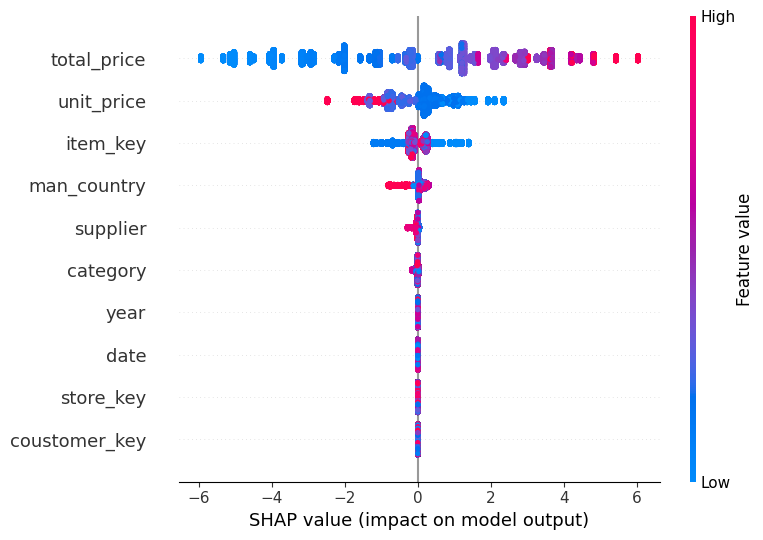

In [74]:
import shap
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming df_encoded is your DataFrame after label encoding
X = df_encoded[['coustomer_key', 'store_key', 'item_key', 'unit_price', 'total_price', 'category','man_country', 'supplier', 'date', 'year']]
y = df_encoded['quantity']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Initialize the shap explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Display a summary plot
shap.summary_plot(shap_values, X)


In [75]:
# import shap
# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd
# shap.initjs()  # Initialize the shap library for interactive plots
# shap.force_plot(explainer.expected_value, shap_values, data_point, matplotlib=True)


# # Assuming df_encoded is your DataFrame after label encoding
# X = df_encoded[['coustomer_key', 'store_key', 'item_key', 'unit_price', 'total_price','desc', 'category','man_country', 'supplier', 'date', 'year']]
# y = df_encoded['quantity']

# # Train a RandomForestRegressor model
# model = RandomForestRegressor()
# model.fit(X, y)

# # Initialize the shap explainer
# explainer = shap.TreeExplainer(model)

# # Choose a specific data point (e.g., the first row)
# data_point = X.iloc[0]

# # Calculate SHAP values for the chosen data point
# shap_values = explainer.shap_values(data_point)

# # Display a force plot for the chosen data point
# shap.force_plot(explainer.expected_value, shap_values, data_point)


In [76]:
df_regression=df.drop(['coustomer_key','store_key','item_key','date'], axis=1)

In [77]:
# Assuming 'df' is your DataFrame
train_sales, test_sales = train_test_split(df_regression, test_size=0.2, random_state=42)

In [78]:
train_sales

,quantity,unit,unit_price,total_price,man_country,supplier,year,category
18465,4,bottles,14.0,56.0,Finland,HARDFORD AB,2017,Juice
9473,6,cans,55.0,330.0,United States,MAESA SAS,2015,Energy/Protein
6725,7,bottles,14.0,98.0,Finland,HARDFORD AB,2015,Juice
31825,4,oz,13.0,52.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2019,Kitchen Supplies
18796,8,ct,21.0,168.0,Bangladesh,DENIMACH LTD,2017,Kitchen Supplies
...,...,...,...,...,...,...,...,...
6265,8,ct,15.0,120.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2015,Kitchen Supplies
11284,6,pk,15.0,90.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2016,Sweets
38158,9,ct,15.0,135.0,Lithuania,BIGSO AB,2020,Juice
860,8,pk,15.0,120.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2014,Sweets


In [79]:
test_sales

,quantity,unit,unit_price,total_price,man_country,supplier,year,category
34568,11,ct,15.0,165.0,Lithuania,BIGSO AB,2020,Juice
1912,3,ct,18.0,54.0,Lithuania,BIGSO AB,2014,Healthy
27222,11,ct,18.0,198.0,Lithuania,BIGSO AB,2018,Healthy
33247,6,ct,21.0,126.0,Bangladesh,DENIMACH LTD,2020,Kitchen Supplies
36255,3,ct,15.0,45.0,Lithuania,BIGSO AB,2020,Juice
...,...,...,...,...,...,...,...,...
29243,5,ct,18.0,90.0,Lithuania,BIGSO AB,2019,Healthy
24678,11,pk,15.0,165.0,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,2018,Sweets
24453,8,ct,18.0,144.0,Lithuania,BIGSO AB,2018,Healthy
15593,6,bottles,14.0,84.0,Finland,HARDFORD AB,2016,Juice


In [80]:
## Saving regression dataset
train_sales.to_csv("datasets//train_test_data/train_sales.csv", index=False)
test_sales.to_csv("datasets//train_test_data/test_sales.csv", index=False)
df_regression.to_csv("datasets//train_test_data/sales_data.csv", index=False)

In [85]:

## taking only 25k rows i.e sample
sample= df_regression.head(2500)
## spliting train and test
train_sales_sample, test_sales_sample = train_test_split(sample, test_size=0.2, random_state=42)
### save train and test  
train_sales_sample.to_csv("datasets//train_test_data/sample/train_sales_sample.csv", index=False)
test_sales_sample.to_csv("datasets//train_test_data/sample/test_sales_sample.csv", index=False)
sample.to_csv("datasets//train_test_data/sample/sample_data.csv", index=False)

In [82]:
impord

NameError: name 'impord' is not defined

## Testing Regression Model

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import joblib

# Load the dataset (replace with your actual path)
path = 'datasets/train_test_data/sample/train_sales_sample.csv'
df = pd.read_csv(path)

# Assume 'unit', 'man_country', 'category' are categorical features
categorical_features = ['unit','man_country', 'supplier', 'category']
numerical_features = ['unit_price','total_price','year']

# Separate features and target
features = categorical_features + numerical_features
target = 'quantity'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformers to appropriate feature subsets
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the model
model = LinearRegression()

# Create a pipeline combining the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
exp_var = explained_variance_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Explained Variance Score: {exp_var:.3f}")

# Save the pipeline (including the model and preprocessing steps)
pipeline_filename = 'regression_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)


Mean Squared Error: 3.236
R-squared: 0.659
Mean Absolute Error: 1.397
Explained Variance Score: 0.659


['regression_pipeline.pkl']

               0      1     2      3     4     5     6     7     8     9
quantity    4.00  11.00  6.00  10.00  3.00  9.00  9.00  6.00  7.00  9.00
Prediction  4.92  16.06  5.98   8.99  4.36  7.26  7.92  5.88  6.66  7.55


<AxesSubplot: >

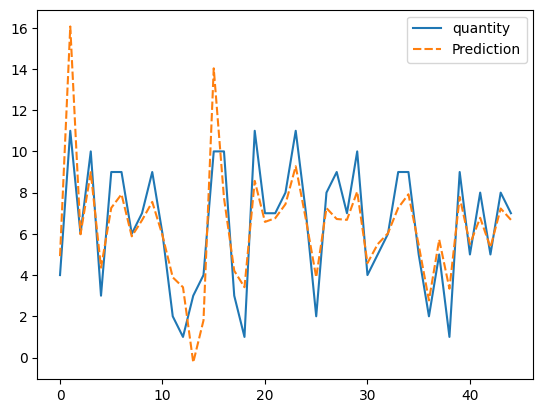

In [152]:
# Load the pipeline
saved_model = 'regression_pipeline.pkl'
loaded_pipeline = joblib.load(saved_model)
## Load the test dataset
new_data= pd.read_csv('datasets/train_test_data/sample/test_sales_sample.csv')
# new_data
# Assuming 'new_data' is your new dataset with features similar to the ones used during training
# Make predictions
new_predictions = loaded_pipeline.predict(new_data)

# Display or use the predictions as needed
new_data['Prediction']=np.round(new_predictions,2)
print((new_data[['quantity','Prediction']].head(10)).T)
sns.lineplot(new_data[['quantity','Prediction']].head(45))

### Testing various regression model:

- ### testing with mlflow

In [159]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn import metrics
import joblib
import mlflow
import mlflow.sklearn

# Load the dataset (replace with your actual path)
path = 'datasets/train_test_data/sample/train_sales_sample.csv'
df = pd.read_csv(path)

# Assume 'unit', 'man_country', 'category' are categorical features
categorical_features = ['unit','man_country', 'supplier', 'category']
numerical_features = ['unit_price','total_price','year']

# Separate features and target
features = categorical_features + numerical_features
target = 'quantity'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformers to appropriate feature subsets
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Create ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('linear', linear_model),
                                  ('dt', decision_tree_model),
                                  ('rf', random_forest_model),
                                  ('gb', gradient_boosting_model),
                                  ('svr', svr_model)])


# Create a pipeline combining the preprocessor and the model
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', linear_model)])
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', decision_tree_model)])
random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', random_forest_model)])
gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', gradient_boosting_model)])
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', svr_model)])
ensemble_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', ensemble_model)])

# List of models for evaluation
models = {'linear': linear_pipeline, 'dt': decision_tree_model, 'rf': random_forest_model,
        'gb': gradient_boosting_model, 'svr': svr_model, 'ensemble': ensemble_pipeline}

# MLflow tracking
mlflow.set_experiment("regression_experiment")

with mlflow.start_run():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        exp_var = explained_variance_score(y_test, predictions)
        
        print(f"\nModel: {model['model'].__class__.__name__}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Explained Variance Score: {exp_var:.3f}")


        # Log metrics to MLflow
        mlflow.log_metric(f"{model_name}_mse", mse)
        mlflow.log_metric(f"{model_name}_r2", r2)
        mlflow.log_metric(f"{model_name}_mae", mae)
        mlflow.log_metric(f"{model_name}_exp_var", exp_var)

        # Log model to MLflow
        mlflow.sklearn.log_model(model, f"{model_name}_model")

# View the MLflow UI to see the results
print("MLflow run completed. View the results in the MLflow UI.")



Model: LinearRegression
Mean Squared Error: 3.236
R-squared: 0.659
Mean Absolute Error: 1.397
Explained Variance Score: 0.659


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.



Model: DecisionTreeRegressor
Mean Squared Error: 0.000
R-squared: 1.000
Mean Absolute Error: 0.000
Explained Variance Score: 1.000


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.



Model: RandomForestRegressor
Mean Squared Error: 0.000
R-squared: 1.000
Mean Absolute Error: 0.000
Explained Variance Score: 1.000


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.



Model: GradientBoostingRegressor
Mean Squared Error: 0.015
R-squared: 0.998
Mean Absolute Error: 0.082
Explained Variance Score: 0.998


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.



Model: SVR
Mean Squared Error: 0.145
R-squared: 0.985
Mean Absolute Error: 0.182
Explained Variance Score: 0.985


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.



Model: VotingRegressor
Mean Squared Error: 0.161
R-squared: 0.983
Mean Absolute Error: 0.299
Explained Variance Score: 0.983
MLflow run completed. View the results in the MLflow UI.


Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.


               0      1     2      3     4     5     6     7     8     9
quantity    4.00  11.00  6.00  10.00  3.00  9.00  9.00  6.00  7.00  9.00
Prediction  4.92  16.06  5.98   8.99  4.36  7.26  7.92  5.88  6.66  7.55


<AxesSubplot: >

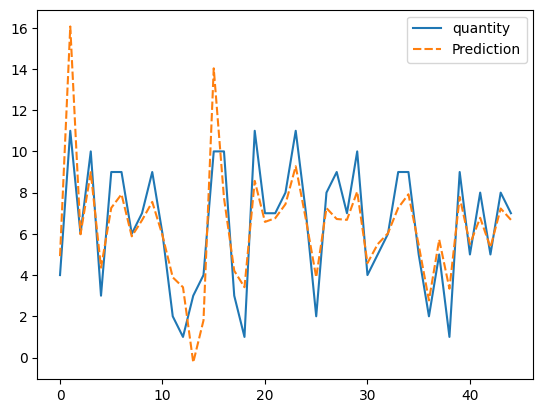

In [158]:
# Load the pipeline
saved_model = 'mlruns/283546878925521656/0bf7fe93b4374a938024ef50953898b7/artifacts/linear_model/model.pkl'
loaded_pipeline = joblib.load(saved_model)
## Load the test dataset
new_data= pd.read_csv('datasets/train_test_data/sample/test_sales_sample.csv')
# new_data
# Assuming 'new_data' is your new dataset with features similar to the ones used during training
# Make predictions
new_predictions = loaded_pipeline.predict(new_data)

# Display or use the predictions as needed
new_data['Prediction']=np.round(new_predictions,2)
print((new_data[['quantity','Prediction']].head(10)).T)
sns.lineplot(new_data[['quantity','Prediction']].head(45))

## Autoregression Model

- #### test on fake data:


Mean Squared Error: 68217.96906047003


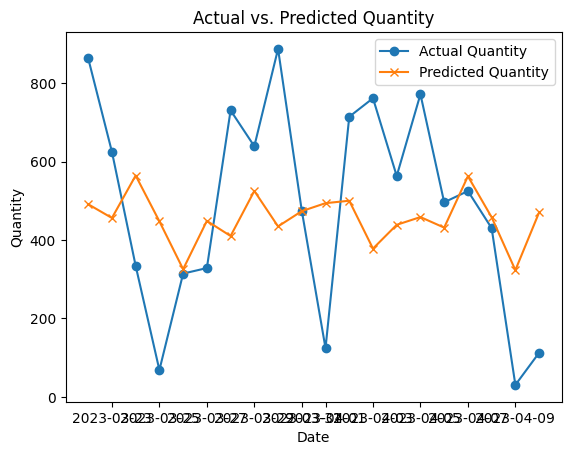

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
# Generate a time series dataset
num_samples = 100
quantity = np.random.uniform(5, 1000, size=num_samples)  # Random quantity values as floats

# Create dates: assuming a daily time series, you can use pd.date_range
date_range = pd.date_range(start='2023-01-01', periods=num_samples, freq='D')

# Create lagged quantity as a feature
lagged_quantity = np.roll(quantity, 1)
lagged_quantity[0] = np.nan

# Other features (for simplicity, adding random noise)
unit_price = np.random.uniform(5, 10, size=num_samples)
# total_price = quantity * unit_price + np.random.normal(0, 10, size=num_samples)
total_price = quantity  + np.random.normal(0, 1000, size=num_samples)

# Create DataFrame
data = pd.DataFrame({
    'date': date_range,
    'quantity': quantity,
    'lagged_quantity': lagged_quantity,
    'unit_price': unit_price,
    'total_price': total_price
})

# Define features and target
features = ['lagged_quantity', 'unit_price','total_price']  # Specify features for imputation and modeling
target = 'quantity'

# # Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data[features]), columns=features)
test_data_imputed = pd.DataFrame(imputer.transform(test_data[features]), columns=features)

# Train a simple linear regression model
model = LinearRegression()
model.fit(train_data_imputed, train_data[target])

# Make predictions on the test set
predictions = model.predict(test_data_imputed[features])

# Evaluate the model
mse = mean_squared_error(test_data[target], predictions)
print(f'Mean Squared Error: {mse}')


# Plot actual vs. predicted values
plt.plot(test_data['date'], test_data[target], label='Actual Quantity', marker='o')
plt.plot(test_data['date'], predictions, label='Predicted Quantity', marker='x')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs. Predicted Quantity')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Load the dataset
url = 'your_dataset_url_or_path.csv'  # Replace with the actual path or URL of your dataset
df = pd.read_csv(url)

# Assume 'date' is the time column, and 'quantity' is the target variable
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Assume 'unit', 'unit_price', 'man_country', 'year', 'category' are additional features
features = ['unit', 'unit_price', 'man_country', 'year', 'category']

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['unit', 'man_country', 'category'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], df_encoded['quantity'], test_size=0.2, random_state=42)

# Grid search for optimal lag value
best_model = None
best_mse = float('inf')
for lag in range(1, 21):  # Adjust the range based on your preference
    lagged_quantity = np.roll(df['quantity'], lag)
    lagged_quantity[:lag] = 0

    X_train['lagged_quantity'] = lagged_quantity[:len(X_train)]
    X_test['lagged_quantity'] = lagged_quantity[len(X_train):]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_lag = lag

print(f'Best Lag Value: {best_lag}')
print(f'Mean Squared Error with Best Lag: {best_mse}')

# Save the trained model with the best lag as a joblib file
joblib.dump(best_model, f'autoregressive_quantity_model_lag_{best_lag}.joblib')
